Importing

In [50]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.metrics import classification_report #classification report
from sklearn.metrics import confusion_matrix #confusion matrix
from sklearn.model_selection import train_test_split # train test split
from sklearn.datasets import load_digits # digits dataset
import matplotlib.pyplot as plt
import seaborn as sns

# Gamma Hadron Particle Classification

In [11]:
columns_names = ["fLength", "fWidth", "fSize", "fConc", "fConc1", "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "class"]
df = pd.read_csv("magic04.data", names =columns_names)

df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [12]:
df["class"] = (df["class"] == 'g').astype(int)
df["class"].unique()

array([1, 0])

Get, X, Y

In [13]:
x = df.drop("class", axis = 1)
y = df["class"]

Train, Test, split

In [14]:
x_test, x_train, y_test, y_train = train_test_split(x, y, test_size = 0.3, random_state = 42)

KNN model

In [15]:
model = KNeighborsClassifier(10).fit(x_train, y_train)
pre = model.predict(x_test)

In [16]:
print(classification_report(y_test, pre))

              precision    recall  f1-score   support

           0       0.78      0.58      0.67      4687
           1       0.80      0.91      0.85      8627

    accuracy                           0.80     13314
   macro avg       0.79      0.75      0.76     13314
weighted avg       0.79      0.80      0.79     13314



# MNIST data recognition

In [26]:
digits_data = load_digits()
dir(digits_data)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

Data loading

In [27]:
df_data = pd.DataFrame(digits_data.data)
df_data.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


showing first 5 images

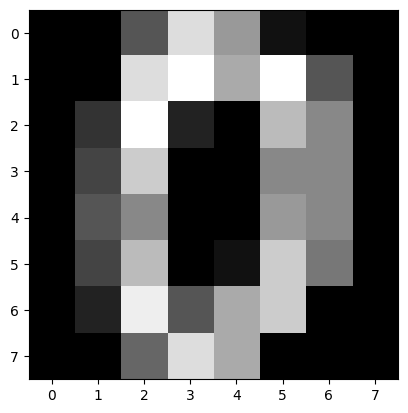

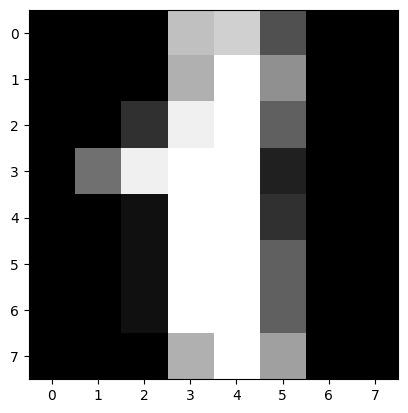

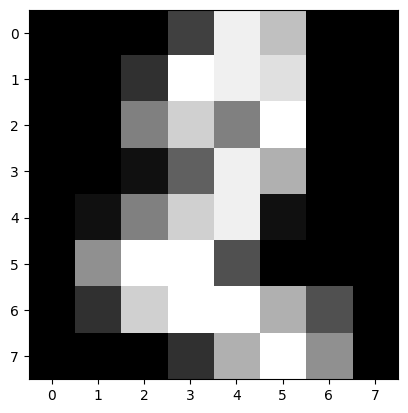

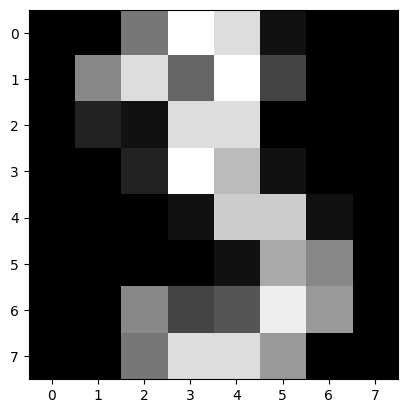

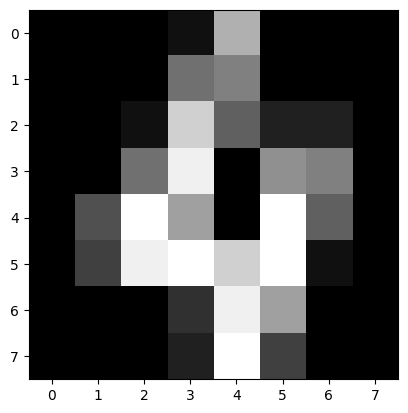

In [54]:
for i in range(5):
  plt.imshow(digits_data.images[i], cmap="gray")
  plt.show()

targets loading

In [28]:
df_target = pd.DataFrame(digits_data.target, columns = ["target"])
df_target.head()

,target
0,0
1,1
2,2
3,3
4,4


concatination both

In [29]:
df = pd.concat([df_data, df_target], axis="columns")
df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


Getting X, Y

In [30]:
X = df.drop("target", axis="columns")
y = df["target"]

Train, Test split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Model training and prediction

In [47]:
knn = KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train)
pre = knn.predict(X_test)

Report

In [48]:
print("Train score: ", knn.score(X_train, y_train))
print("Test score: ", knn.score(X_test, y_test))
print(classification_report(y_test, pre))

Train score:  0.9896579156722355
Test score:  0.9925925925925926
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       1.00      1.00      1.00        50
           2       1.00      1.00      1.00        47
           3       0.98      1.00      0.99        54
           4       0.98      1.00      0.99        60
           5       0.98      0.98      0.98        66
           6       1.00      1.00      1.00        53
           7       1.00      1.00      1.00        55
           8       1.00      1.00      1.00        43
           9       0.98      0.95      0.97        59

    accuracy                           0.99       540
   macro avg       0.99      0.99      0.99       540
weighted avg       0.99      0.99      0.99       540



Confusion matrix

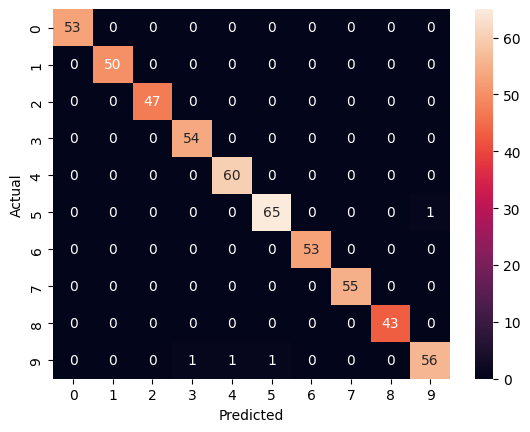

In [53]:
confusion_mat = confusion_matrix(y_test, pre)
sns.heatmap(confusion_mat, annot=True)
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()